In [5]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [3]:
#pip install --upgrade pip

In [4]:
#pip install tensorflow

# preprocessing

In [82]:
SPX = pd.read_fwf('data/SPX.txt' ,names=['Date', 'Close'], parse_dates=True)

In [83]:
SPX.head()

,Date,Close
0,06/01/1995,"460,68"
1,13/01/1995,"465,97"
2,20/01/1995,"464,78"
3,27/01/1995,"470,39"
4,03/02/1995,"478,64"


In [84]:
VIX = pd.read_fwf('data/VIX.txt' ,names=['Date', 'Close'], parse_dates=True)


In [85]:
VIX.head()

,Date,Close
0,06/01/1995,"13,13"
1,13/01/1995,"11,1"
2,20/01/1995,"12,15"
3,27/01/1995,"11,25"
4,03/02/1995,"10,98"


In [86]:
SPX.describe()

,Date,Close
count,1292,1292
unique,1292,1243
top,17/01/2014,"1122,7"
freq,1,3


### remplacer des virgules par point

In [87]:
SPX['Close'] = SPX['Close'].apply(lambda x: float(x.split()[0].replace(',', '.')))
VIX['Close'] = VIX['Close'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [88]:
print(SPX.index)
print(VIX.index)

RangeIndex(start=0, stop=1292, step=1)
RangeIndex(start=0, stop=1292, step=1)


## **EVOLUTION DU COURS DES NOS DONNEES**

In [89]:
def Plotting_evolution(data):
    data['Close'].plot(figsize=(18, 6))
    plt.show()

EVOLUTION DE SPX_Data DANS LE TEMPS


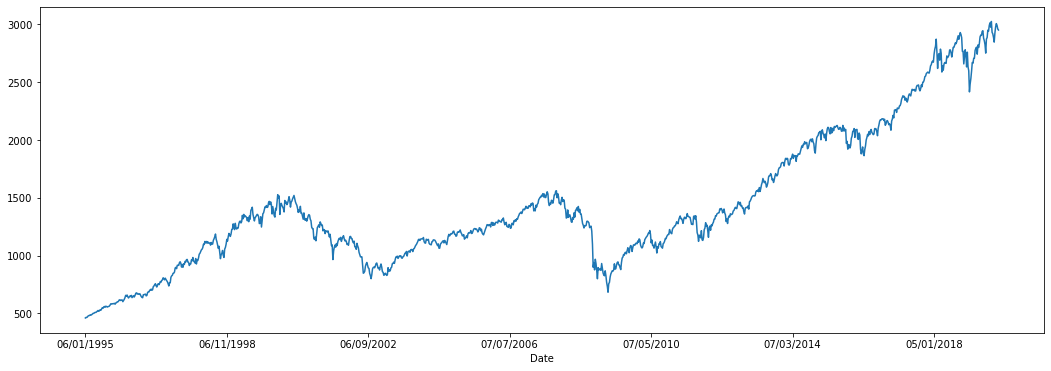

In [90]:
SPX_ = SPX.set_index('Date')

Names =  ['SPX_Data', 'VIX_Data']

print('EVOLUTION DE SPX_Data DANS LE TEMPS')
Plotting_evolution(SPX_)

## SPLIT DATA

In [91]:
train_SPX = SPX.loc[0:1110,'Close']
test_SPX = SPX.loc[1110:,'Close']

def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(14, 9))
    ax.plot(line1, label=label1, linewidth=lw, c='g')
    ax.plot(line2, label=label2, linewidth=lw, C='black')
    ax.set_ylabel('SPX/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

<ipython-input-91-10dfa0671143>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(line2, label=label2, linewidth=lw, C='black')


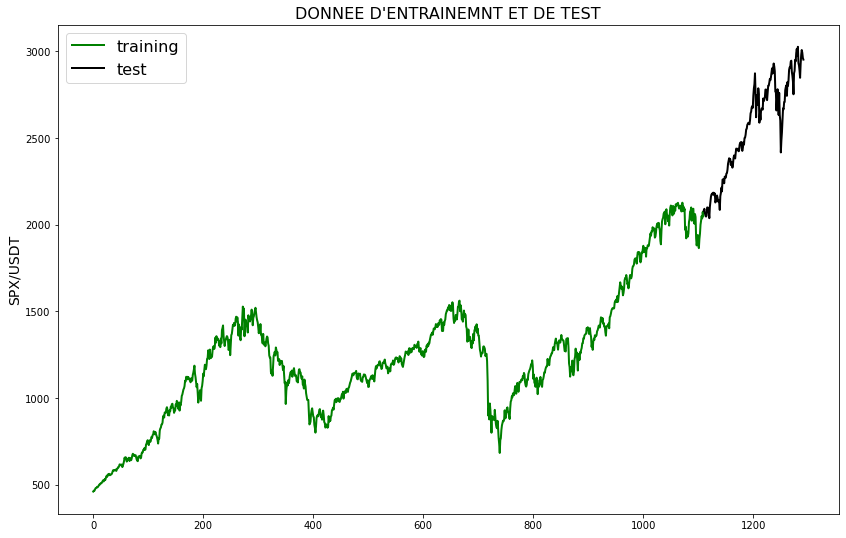

In [92]:
line_plot(train_SPX, test_SPX, 'training', 'test', title="DONNEE D'ENTRAINEMNT ET DE TEST")

---

#### en verte les données d'entrainement et en noir les données des test

## TRAINING DATA

<AxesSubplot:>

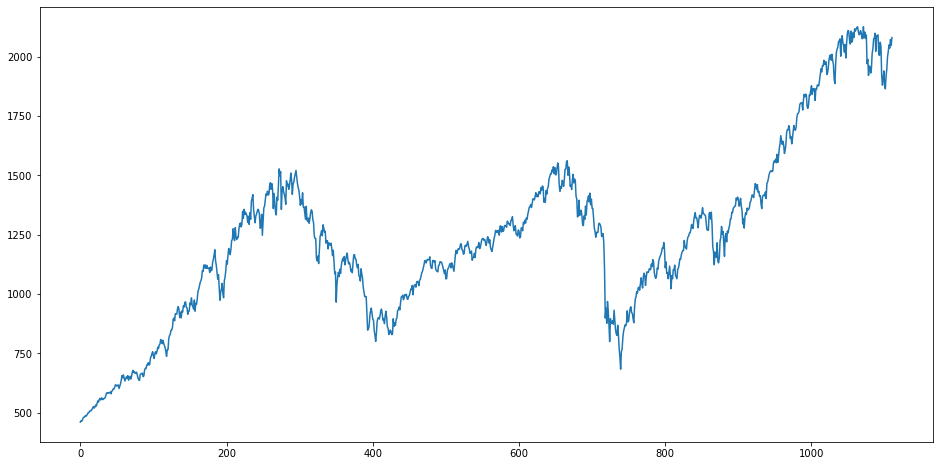

In [73]:
train_SPX.plot(figsize=(16,8))

## TEST DATA

<AxesSubplot:>

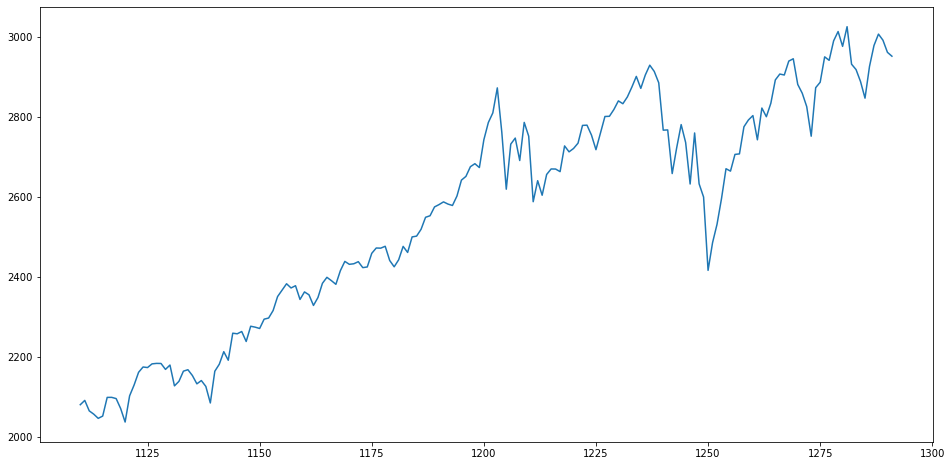

In [31]:
test_SPX.plot(figsize=(16,8))

# STANDARDISATION DES NOS DONNEES


In [32]:
def normalise_zero_base(data):
    return data / data.iloc[0] - 1

In [33]:
def prepare_data(train_SPX, test_SPX,window_len=10, zero_base=True, test_size=0.2):
    def extract_window_data(data, window_len=5, zero_base=True):
        window_data = []
        for idx in range(len(data) - window_len):
            tmp = data[idx: (idx + window_len)].copy()
            if zero_base:
                tmp = normalise_zero_base(tmp)
            window_data.append(tmp.values)
        return np.array(window_data)

    X_train = extract_window_data(train_SPX, window_len, zero_base)
    X_test = extract_window_data(test_SPX, window_len, zero_base)
    y_train = train_SPX[window_len:].values
    y_test = test_SPX[window_len:].values
    if zero_base:
        y_train = y_train / train_SPX[:-window_len].values - 1
        y_test = y_test / test_SPX[:-window_len].values - 1
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return train_SPX, test_SPX, X_train, X_test, y_train, y_test

___

## PREMIER MODEL 

In [43]:

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, Dropout, LSTM, Activation, GRU
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import Series
from tensorflow.python.keras import optimizers

PREP DATA

In [36]:
from sklearn.preprocessing import MinMaxScaler
import math

In [37]:
X = np.array(SPX['Close'])
X = X.reshape((1292, 1))

training_data_len = math.ceil(len(X)* 0.75)

sc = MinMaxScaler(feature_range=(0,1))
training_data = sc.fit_transform(X)
training_data

array([[0.        ],
       [0.00206228],
       [0.00159837],
       ...,
       [0.98682323],
       [0.97501092],
       [0.97122942]])

In [40]:
def spltdata(training_data):
    split_val = 887
    train_data = training_data[0:split_val  , : ]

    X_train = []
    y_train = []
    for i in range(180, len(train_data)):
        X_train.append(train_data[i-180:i, 0])
        y_train.append(train_data[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    print('Nombre des lignes et colonnes: ', X_train.shape)

    test_data = training_data[split_val - 180: , : ]
    X_test = []
    y_test =  X[split_val : , : ]
    for i in range(180,len(test_data)):
        X_test.append(test_data[i-180:i,0])

    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    print('Nombre des lignes et colonnes : ', X_test.shape)
    return X_train, y_train, X_test, y_test, training_data

In [41]:
X_train, y_train, X_test, y_test, training_data = spltdata(training_data)

Nombre des lignes et colonnes:  (707, 180, 1)
Nombre des lignes et colonnes :  (405, 180, 1)


creation de model

In [44]:
model_GRU = Sequential()
model_GRU.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units = 50, return_sequences = True))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units = 50, return_sequences = True))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units = 50, return_sequences=True))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units = 50, return_sequences=True))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units = 50, return_sequences=True))
model_GRU.add(Dropout(0.2))
model_GRU.add(GRU(units = 50))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(units = 1))

compile du model

In [47]:
model_GRU.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

FIT MODEL

In [48]:
model_GRU.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
23/23 [==============================] - 56s 2s/step - loss: 0.0151
Epoch 2/50
23/23 [==============================] - 42s 2s/step - loss: 0.0047
Epoch 3/50
23/23 [==============================] - 37s 2s/step - loss: 0.0032
Epoch 4/50
23/23 [==============================] - 38s 2s/step - loss: 0.0021
Epoch 5/50
23/23 [==============================] - 38s 2s/step - loss: 0.0018
Epoch 6/50
23/23 [==============================] - 38s 2s/step - loss: 0.0018
Epoch 7/50
23/23 [==============================] - 37s 2s/step - loss: 0.0019
Epoch 8/50
23/23 [==============================] - 37s 2s/step - loss: 0.0015
Epoch 9/50
23/23 [==============================] - 37s 2s/step - loss: 0.0016
Epoch 10/50
23/23 [==============================] - 37s 2s/step - loss: 0.0014
Epoch 11/50
23/23 [==============================] - 37s 2s/step - loss: 0.0014
Epoch 12/50
23/23 [==============================] - 37s 2s/step - loss: 0.0015
Epoch 13/50
23/23 [==============================

In [50]:
pred = model_GRU.predict(X_test)
pred = sc.inverse_transform(pred)
train = data[:split_val]
valid = data[split_val:]
valid['Predictions'] = pred
score = r2_score(y_test, pred)
score

TypeError: list indices must be integers or slices, not str

# DEUXIEME MODEL LSTM

- Creation de modele lstm

In [51]:
def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

- Les paramettres pour l'entrainement du model

In [52]:
np.random.seed(245)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 40
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'

## SPLIT DATA

In [53]:
train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
train_SPX, test_SPX, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [54]:
print('Len of X training data', X_train.shape)
print('Len of Y training data',y_train.shape)

Len of X training data (1106, 5, 1)
Len of Y training data (1106,)


In [55]:
print('Len of X test data',X_test.shape)
print('Len of y test data',y_test.shape)

Len of X test data (177, 5, 1)
Len of y test data (177,)


## TRAINING MODELE 1 LSTM

In [56]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
     

Epoch 1/40
35/35 [==============================] - 4s 21ms/step - loss: 0.0021 - val_loss: 7.4565e-04
Epoch 2/40
35/35 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 5.4101e-04
Epoch 3/40
35/35 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 6.2421e-04
Epoch 4/40
35/35 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 4.7610e-04
Epoch 5/40
35/35 [==============================] - 0s 11ms/step - loss: 9.3610e-04 - val_loss: 5.1155e-04
Epoch 6/40
35/35 [==============================] - 0s 9ms/step - loss: 8.7348e-04 - val_loss: 4.0269e-04
Epoch 7/40
35/35 [==============================] - 0s 9ms/step - loss: 8.2181e-04 - val_loss: 4.2102e-04
Epoch 8/40
35/35 [==============================] - 0s 9ms/step - loss: 7.4798e-04 - val_loss: 3.6055e-04
Epoch 9/40
35/35 [==============================] - 0s 9ms/step - loss: 7.3702e-04 - val_loss: 3.4457e-04
Epoch 10/40
35/35 [==============================] - 0s 9ms

## COURBE D'ENTRAINEMENT ET DE TEST

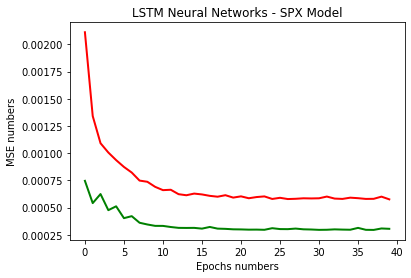

In [57]:
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM Neural Networks - SPX Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [94]:
targets = test_SPX[window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.012907291310471823

In [95]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

0.00030474057506691413

In [96]:
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test, preds)
r2_score1*100

73.58097858044846

In [97]:
preds = test_SPX.values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)

# PREDICTION DU MODEL 1 LSTM

<AxesSubplot:>

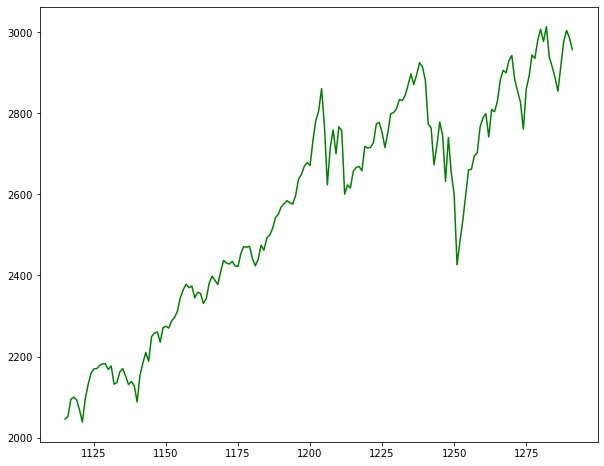

In [98]:
preds = pd.Series(index=targets.index, data=preds)
preds.plot(figsize=(10,8) , c='g')

## COMPARAISON DES VRAIE DONNEE AVEC LES PREDICTIONS

<ipython-input-91-10dfa0671143>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(line2, label=label2, linewidth=lw, C='black')


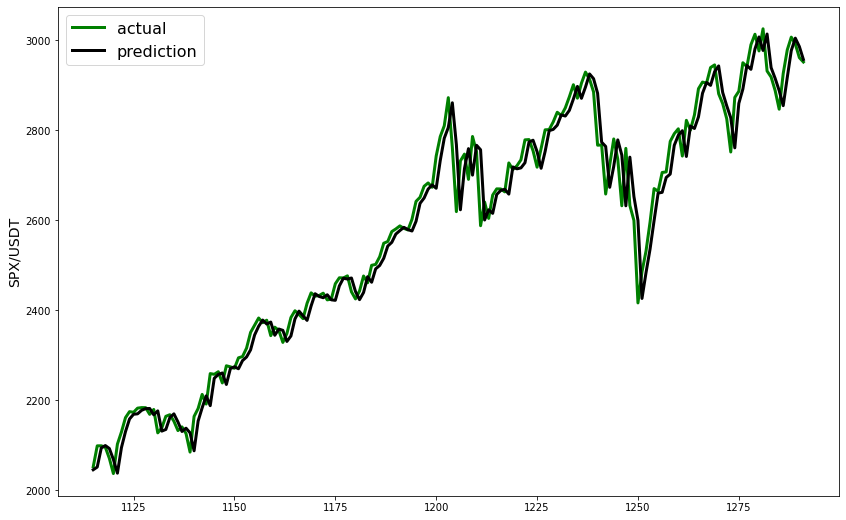

In [99]:
line_plot(targets, preds, 'actual', 'prediction', lw=3)

## PREDICTION DU MODEL SUR LES DONNEES DE TEST

<ipython-input-91-10dfa0671143>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(line2, label=label2, linewidth=lw, C='black')


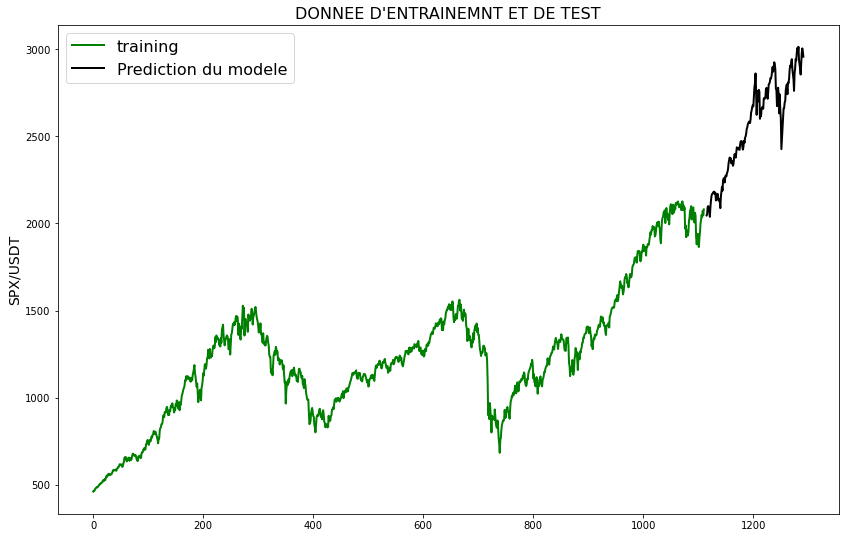

In [102]:
line_plot(train_SPX,preds, 'training', 'Prediction du modele', title="DONNEE D'ENTRAINEMNT ET DE TEST")

## MODEL 2 Recurrent Neural network AVEC KERAS

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import Series
import keras
from keras import optimizers
from keras.layers import Activation, Dense,Dropout

In [ ]:
df = SPX.set_index('Date')
data=df.copy()

In [ ]:
data.head()

In [ ]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
look_back=7
numpy.random.seed(0)

# load the dataset
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)
# normalize the dataset
scaler = MinMaxScaler()
#scaler=RobustScaler()
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
#look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network


## CREATE MODEL

In [ ]:
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
#model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))

In [ ]:
predictions

## COMPILE MODEL

In [ ]:
#keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False, clipnorm=1)

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, verbose=1,shuffle=False,batch_size=50)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
#data=pd.DataFrame(numpy.concatenate((trainPredict[0:len(trainPredict)-look_back-1],testPredict[0:len(testPredict)-look_back-1])),columns=["predicted"])
#print('one',data.count())
#print('two',dataframe.count())
predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

In [ ]:
line_plot(testX, testPredict, 'actual', 'prediction', lw=3)

In [ ]:
line_plot(SPX['Close'], predictions, 'actual', 'prediction', lw=3)

In [ ]:
train_SPX = SPX.loc[0:1110,'Close']
test_SPX = preds

def line_plot(line1, line2 ,label1=None, label2=None,title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(14, 9))
    ax.plot(line1, label=label1, linewidth=lw, c='r')
    ax.plot(line2, label=label2, linewidth=lw, c='g')
    ax.set_ylabel('SPX/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);


In [ ]:
line_plot(trainPredict, testPredict, 'training', 'Prediction du modele', title="DONNEE D'ENTRAINEMNT ET DE TEST")

In [ ]:
testX_ = scaler.inverse_transform(testX)

In [ ]:
testX_ = testX
testX_.shape

In [ ]:
testX_ = testX_.reshape(-1,)
testX_.shape

In [ ]:
testX_

In [ ]:
testX_ = scaler.inverse_transform(testX_)

In [ ]:
testX_

In [ ]:
line_plot(testX_, testPredict, 'training', 'Prediction du modele', title="DONNEE D'ENTRAINEMNT ET DE TEST")


In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
trainPredict.plot(figsize=(10,8), c='r')